In [1]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm_matlib
import time
from sklearn.metrics import confusion_matrix

In [2]:
training_set = pd.read_csv('adult.data', sep=",")
training_set

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## *Preprocessing* : the column labels are not consistent with the features declared in the "adult.names" file 
* In that case it could be helpful the "header" parameter of the read_csv method

In [3]:
indexes = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", \
          "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", \
           "native-country", "income"]

In [4]:
training_set = pd.read_csv('adult.data', sep=",", header = None, names=indexes)

In [5]:
testing_set = pd.read_csv('adult.test', sep=",", header = None, names=indexes)

#### We merge the training set and the testing set in a single set so we can do the analysis and preprocessing in the entire dataset

In [6]:
frame = [training_set, testing_set]
dataset = pd.concat(frame, ignore_index=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Now that the headers are correct we can move on to the *Data Cleaning* phase

* Check if there are Nan values

In [7]:
dataset.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

* Check for duplicates

In [8]:
dataset.duplicated().any()

True

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
print(str(len(dataset.columns))+" columns")
print(str(len(dataset))+" rows")

15 columns
48813 rows


## Since the dataset has already been altered, from the adult.names file we know of the presence of "?" values, used to replace the "Unknown" value, so let's remove the lines containing the value "?"

In [11]:
dataset.isin([" ?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [12]:
for column in dataset.columns:
    index_to_delete = dataset[ dataset[column] == ' ?'].index
    dataset.drop(index_to_delete,inplace=True)

In [13]:
dataset.reset_index(inplace=True, drop=True)

* The "?" values are successfully removed

In [14]:
print("The number of rows is", len(dataset))
print("Number of rows with capital-gain equal to 0:", len(dataset[dataset['capital-gain'] == 0]))
print("Number of rows with capital-loss equal to 0:", len(dataset[dataset['capital-loss'] == 0]))

The number of rows is 45194
Number of rows with capital-gain equal to 0: 41404
Number of rows with capital-loss equal to 0: 43054


### We remove the capital-gain and capital-loss columns because they do not provide useful information (most rows have value 0)

In [15]:
dataset.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [16]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,<=50K.
45190,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K.
45191,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K.
45192,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K.


## Descriptive Analytics
### We analyze with a bar plot each feature compared with the income 

In [17]:
# 
# index_col: the feature that we want to plot
# big: we use it only when the feature has many unique values and we want a more readable plot
#
def bar_plot_feature(index_col, big=False):
            
    frame = dataset.pivot_table(index=index_col, values='age',  \
                                columns='income', aggfunc='count', fill_value=0)
    
    frame['%_<='] = (frame[' <=50K'] / (frame[' <=50K'] + frame[' >50K']) ).round(2)
    frame['%_>'] = (frame[' >50K'] / (frame[' <=50K'] + frame[' >50K']) ).round(2)
    
    display(frame)
    
    if(big):
        frame.loc[:,'%_<=':'%_>'].plot.barh(figsize=(10,10))
    else:
        frame.loc[:,'%_<=':'%_>'].plot.barh()

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
workclass,,,,,,
Federal-gov,578,279,365,184,0.61,0.39
Local-gov,1458,727,609,306,0.71,0.29
Private,17390,8642,4874,2375,0.78,0.22
Self-emp-inc,474,259,600,312,0.44,0.56
Self-emp-not-inc,1784,952,714,345,0.71,0.29
State-gov,935,491,344,176,0.73,0.27
Without-pay,14,5,0,2,1.00,0.00


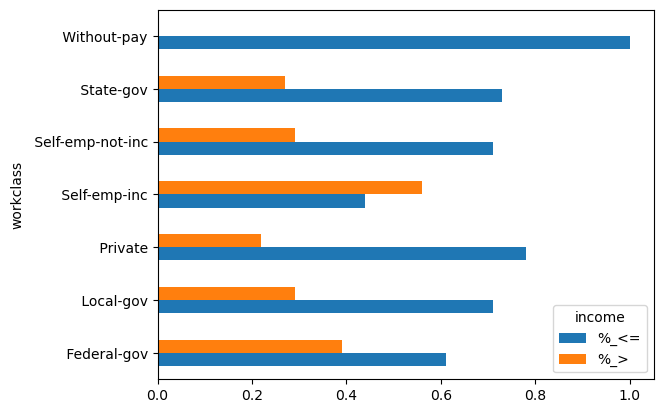

In [18]:
bar_plot_feature('workclass')

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
education,,,,,,
10th,761,380,59,23,0.93,0.07
11th,989,541,59,30,0.94,0.06
12th,348,185,29,14,0.92,0.08
1st-4th,143,69,6,2,0.96,0.04
5th-6th,275,151,12,10,0.96,0.04
7th-8th,521,246,35,20,0.94,0.06
9th,430,208,25,13,0.95,0.05
Assoc-acdm,752,357,256,142,0.75,0.25
Assoc-voc,963,491,344,160,0.74,0.26


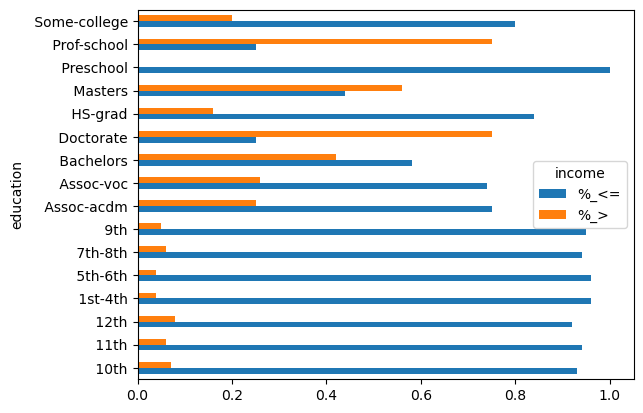

In [19]:
bar_plot_feature('education')

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
marital-status,,,,,,
Divorced,3760,1879,452,203,0.89,0.11
Married-AF-spouse,11,7,10,4,0.52,0.48
Married-civ-spouse,7662,3824,6397,3165,0.54,0.46
Married-spouse-absent,339,159,31,23,0.92,0.08
Never-married,9241,4638,470,231,0.95,0.05
Separated,873,439,66,33,0.93,0.07
Widowed,747,409,80,41,0.90,0.10


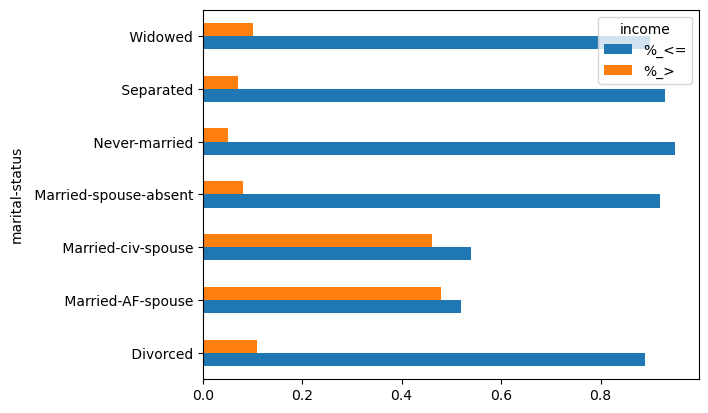

In [20]:
bar_plot_feature('marital-status')

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
occupation,,,,,,
Adm-clerical,3221,1560,498,258,0.87,0.13
Armed-Forces,8,2,1,3,0.89,0.11
Craft-repair,3117,1543,908,447,0.77,0.23
Exec-managerial,2054,1061,1937,930,0.51,0.49
Farming-fishing,872,433,115,57,0.88,0.12
Handlers-cleaners,1266,644,83,52,0.94,0.06
Machine-op-inspct,1720,883,244,120,0.88,0.12
Other-service,3077,1532,132,64,0.96,0.04
Priv-house-serv,140,87,1,2,0.99,0.01


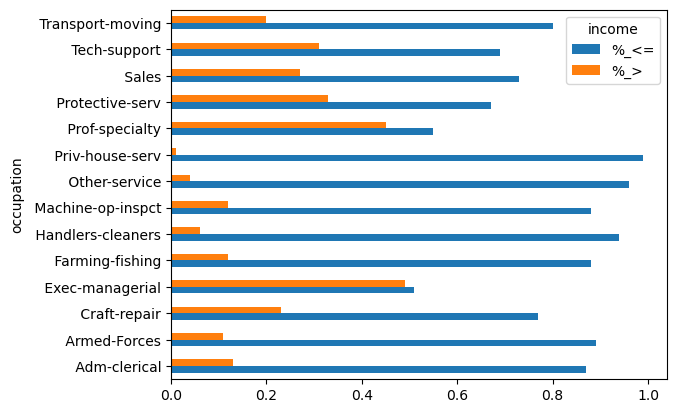

In [21]:
bar_plot_feature('occupation')

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
relationship,,,,,,
Husband,6780,3374,5677,2828,0.54,0.46
Not-in-family,6891,3568,823,405,0.89,0.11
Other-relative,854,445,35,15,0.96,0.04
Own-child,4398,2118,64,41,0.99,0.01
Unmarried,2998,1487,213,89,0.93,0.07
Wife,712,363,694,322,0.51,0.49


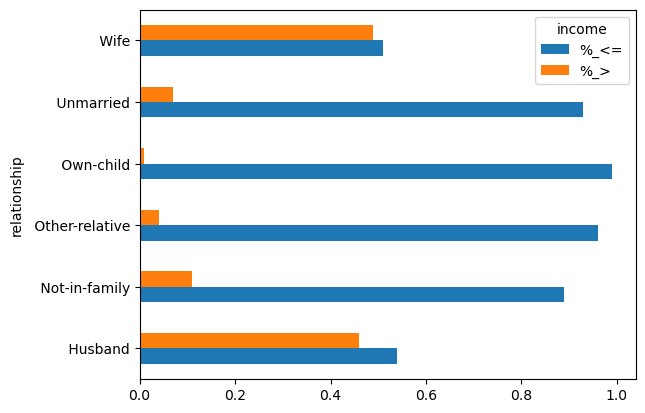

In [22]:
bar_plot_feature('relationship')

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
race,,,,,,
Amer-Indian-Eskimo,252,130,34,19,0.88,0.12
Asian-Pac-Islander,646,287,248,121,0.72,0.28
Black,2450,1243,366,168,0.87,0.13
Other,210,98,21,24,0.91,0.09
White,19075,9597,6837,3368,0.74,0.26


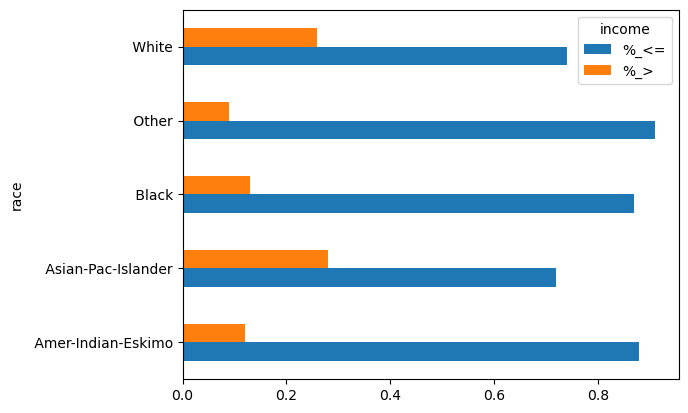

In [23]:
bar_plot_feature('race')

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
sex,,,,,,
Female,8661,4355,1112,557,0.89,0.11
Male,13972,7000,6394,3143,0.69,0.31


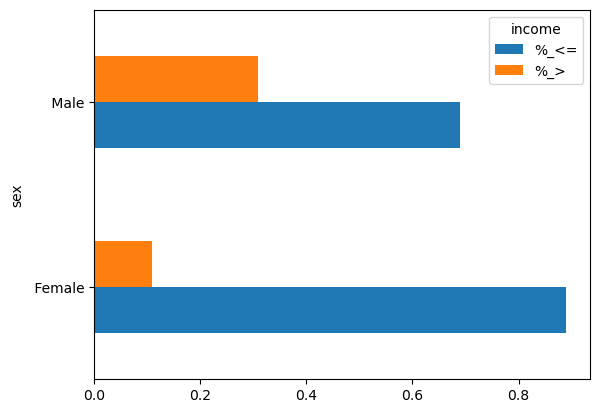

In [24]:
bar_plot_feature('sex')

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
native-country,,,,,,
Cambodia,11,6,7,2,0.61,0.39
Canada,71,32,36,24,0.66,0.34
China,48,29,20,16,0.71,0.29
Columbia,54,24,2,2,0.96,0.04
Cuba,67,32,25,9,0.73,0.27
Dominican-Republic,65,27,2,3,0.97,0.03
Ecuador,23,14,4,2,0.85,0.15
El-Salvador,91,45,9,2,0.91,0.09
England,56,16,30,17,0.65,0.35


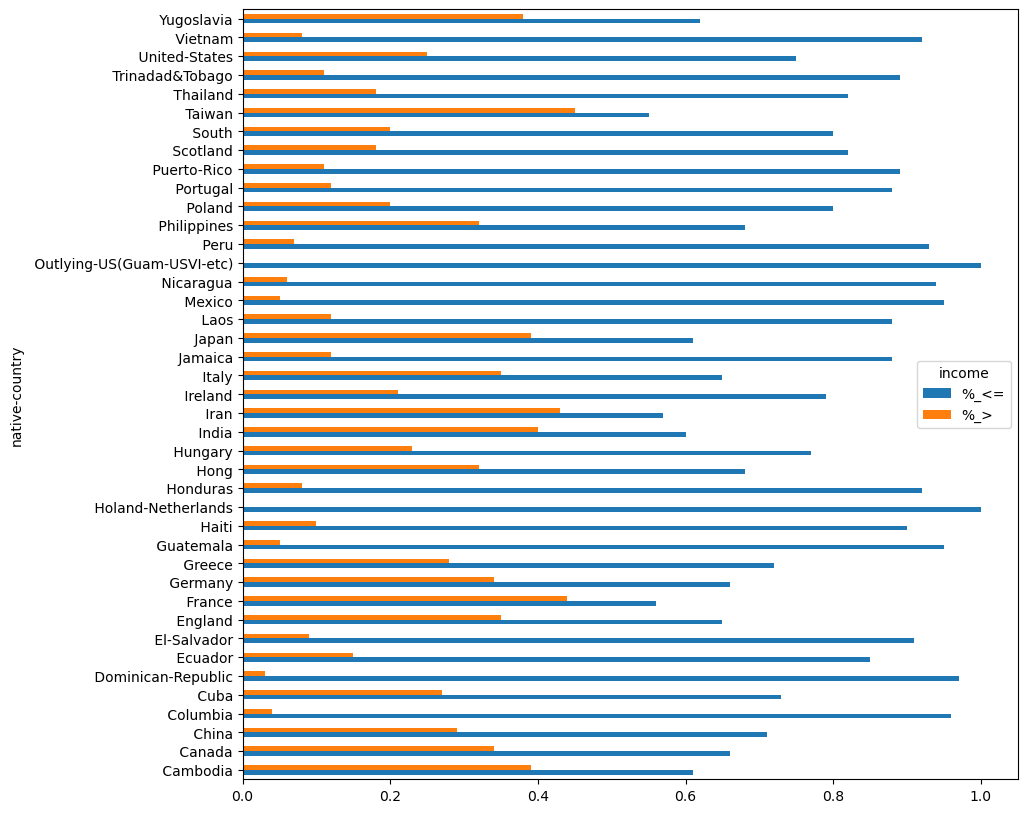

In [25]:
bar_plot_feature('native-country', big=True)

income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
ten_year,,,,,,
10-20,1364,681,1,1,1.00,0.00
20-30,6913,3350,493,226,0.93,0.07
30-40,5967,3025,2241,1124,0.73,0.27
40-50,4303,2117,2591,1288,0.62,0.38
50-60,2547,1308,1638,771,0.61,0.39
60-70,1182,646,452,234,0.72,0.28
70-80,280,189,77,43,0.78,0.22
80-90,50,33,6,8,0.89,0.11
90-100,27,6,7,5,0.79,0.21


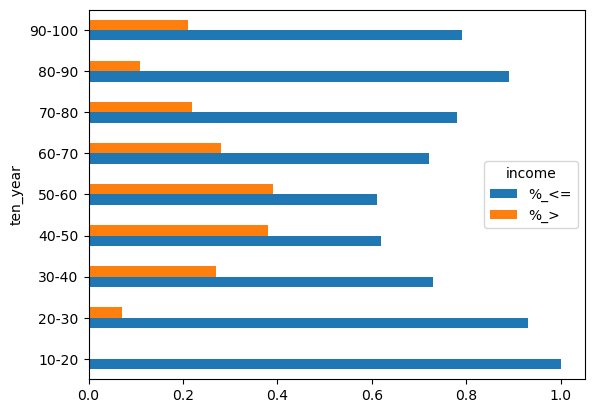

In [26]:
# we create groups of 10 year 

dataset['ten_year'] = dataset['age']//10
for i in dataset.index:
    dataset.loc[i,'ten_year'] = str(dataset.loc[i,'ten_year'])+'0-'+str(dataset.loc[i,'ten_year'] + 1)+'0'
dataset

bar_plot_feature('ten_year')

In [27]:
# we delete the new added column
dataset.drop('ten_year',axis=1,inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,<=50K.
45190,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K.
45191,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K.
45192,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K.


income,<=50K,<=50K.,>50K,>50K.,%_<=,%_>
hours,,,,,,
0-5,67,39,6,6,0.92,0.08
10-15,385,185,26,11,0.94,0.06
15-20,597,294,33,19,0.95,0.05
20-25,1259,643,94,41,0.93,0.07
25-30,665,306,42,18,0.94,0.06
30-35,1192,611,103,49,0.92,0.08
35-40,1689,879,334,159,0.83,0.17
40-45,11546,5760,3295,1644,0.78,0.22
45-50,1534,744,866,434,0.64,0.36


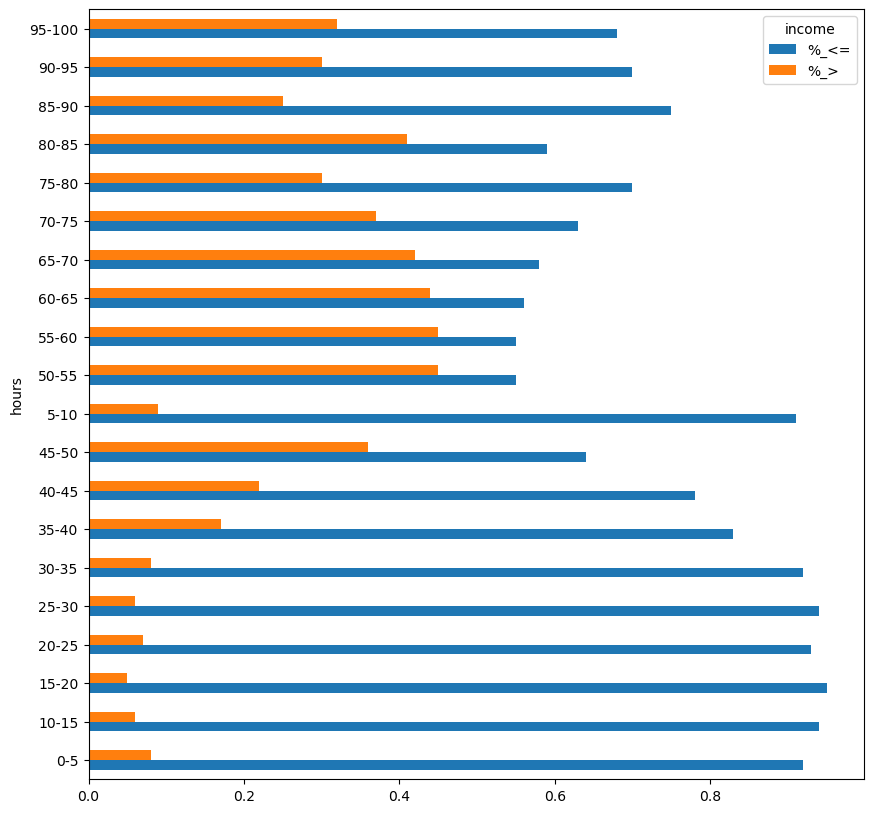

In [28]:
# we create group of 5 hours 

dataset['hours'] = dataset['hours-per-week']//5
for i in dataset.index:
    dataset.loc[i,'hours'] = str(dataset.loc[i,'hours'] * 5)+'-'+str(dataset.loc[i,'hours'] * 5 + 5)
dataset

bar_plot_feature('hours', big=True)

#### Notice that since the groups of hours are listed in lexicographically order, the group "5-10" is listed after the group "45-50". 

In [29]:
# we delete the new added column
dataset.drop('hours',axis=1,inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,<=50K.
45190,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K.
45191,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K.
45192,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K.


### Observing the graphs it can be seen that the values of the "husband" and "wife" relationship feature are redundant because we have the marital-status and sex features from which the same information can be obtained, so we delete the feature "relationship"

In [30]:
dataset.drop(columns=['relationship'],inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,White,Male,40,United-States,<=50K.
45190,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,36,United-States,<=50K.
45191,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,50,United-States,<=50K.
45192,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40,United-States,<=50K.


## We prepare the dataset for the prediction model

### The values of the "income" are replaced with 0 and 1 (being a binary value)

In [31]:
dataset.replace({'income': '<=50K'}, value=0, regex=True, inplace=True)
dataset.replace({'income': '>50K'}, value=1, regex=True, inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,White,Male,40,United-States,0
45190,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,36,United-States,0
45191,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,50,United-States,0
45192,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40,United-States,0


### We observed that the dataset is unbalanced, in fact the 75% of the income observations is equal to 0. 

In [32]:
len(dataset[dataset['income'] == 0]) / len(dataset)

0.752046731867062

In [33]:
len(dataset[dataset['income'] == 1]) / len(dataset)

0.247953268132938

### The values of the "sex" are replaced with 0 and 1 (being a binary value)

In [34]:
dataset.replace({'sex': 'Male'}, value=0, regex=True, inplace=True)
dataset.replace({'sex': 'Female'}, value=1, regex=True, inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,1,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,White,0,40,United-States,0
45190,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,1,36,United-States,0
45191,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,0,50,United-States,0
45192,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,0,40,United-States,0


In [35]:
print(dataset['education'].unique())
print(dataset['education-num'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


### Since "education" has associated the column "education-num" we delete the former and we keep the latter, which is numerical and respects the order

### We delete also the "fnlwgt" (final weight) column because it does not provide useful information for our goal 

In [36]:
dataset.drop(['fnlwgt','education'], axis=1, inplace=True)
dataset

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,White,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,White,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,1,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...
45189,33,Private,13,Never-married,Prof-specialty,White,0,40,United-States,0
45190,39,Private,13,Divorced,Prof-specialty,White,1,36,United-States,0
45191,38,Private,13,Married-civ-spouse,Prof-specialty,White,0,50,United-States,0
45192,44,Private,13,Divorced,Adm-clerical,Asian-Pac-Islander,0,40,United-States,0


### We apply OneHotEncoder method on categorical-data columns

In [37]:
def Encoding(columnName, dataset):
    a = dataset[columnName].unique()
    a.sort()

    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(dataset[[columnName]]).astype(int).toarray())
    
    diz = {i:columnName+'( '+el+' )' for i,el in enumerate(a)}
        
    dataset2 = dataset.join(encoder_df)
    dataset2.drop(columnName, axis=1, inplace=True)
    dataset2.rename(columns=diz, inplace=True)
    return dataset2

In [38]:
datatypes = dataset.dtypes
columnNames = dataset.columns
for i,el in enumerate(datatypes):
    if el == "object":
        dataset = Encoding(columnNames[i], dataset)
dataset

,age,education-num,sex,hours-per-week,income,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),...,native-country( Portugal ),native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia )
0,39,13,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,13,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45190,39,13,1,36,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45191,38,13,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45192,44,13,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Before the analysis we normalize the numerical data

In [39]:
scaler = MinMaxScaler() 

for c in dataset.columns:
    dataset[[c]] = scaler.fit_transform(dataset[[c]])
dataset


,age,education-num,sex,hours-per-week,income,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),...,native-country( Portugal ),native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia )
0,0.301370,0.800000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,0.219178,0.800000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45190,0.301370,0.800000,1.0,0.357143,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45191,0.287671,0.800000,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45192,0.369863,0.800000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
# Move the income column to the end of the data frame 

old_columns = dataset.columns.tolist()

index = dataset.columns.get_loc("income")

new_columns = old_columns[0:index] + old_columns[index+1:] + old_columns[index:index+1]

dataset = dataset[new_columns]
dataset

,age,education-num,sex,hours-per-week,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),workclass( State-gov ),...,native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia ),income
0,0.301370,0.800000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.452055,0.800000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.287671,0.533333,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.493151,0.400000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.150685,0.800000,1.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,0.219178,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45190,0.301370,0.800000,1.0,0.357143,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45191,0.287671,0.800000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45192,0.369863,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Principal Component Analysis 
- First of all we split the dataset 
- 80% of the observation in the training set and the 20% in the test set

In [41]:
train, test = train_test_split(dataset, test_size=0.2, random_state=1)

- x_train contains the predictive variables 
- y_train contains the target variable (the income)

In [42]:
x_train = train.iloc[:,0:-1].values
y_train = train.iloc[:,-1].values

PVE:[0.177237  0.0938809], cumulative PVE:0.2711179008651839


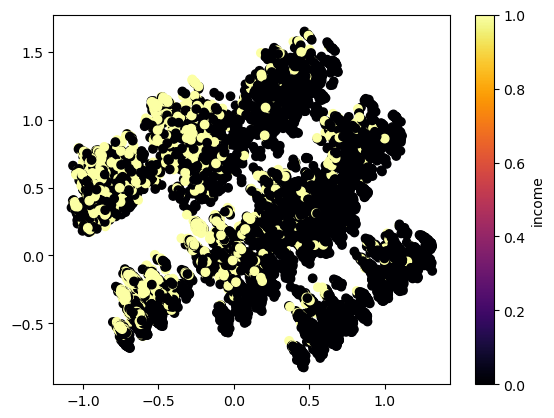

In [43]:
# dimensionality reduction with PCA
pca_model = PCA(n_components=2)

pca_coordinates = pca_model.fit_transform(x_train)

plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=y_train, cmap=plt.colormaps.get_cmap('inferno'))
plt.colorbar(label='income')


PVE = pca_model.explained_variance_ratio_
PVE_cum = np.sum(PVE)

print(f'PVE:{PVE}, cumulative PVE:{PVE_cum}')

#### We can observe that:
- the cumulative PVE is low: first two principal components explain only the 27% of the total variance.
- in the scatter plot there is no well-defined clustering because the points overlap, indicating that the observations do not form distinct clusters. To obtain a more accurate assessment, we will use the K-means algorithm.

### Biplot  PCA

In [44]:
loadings = pca_model.components_

In [45]:
# returns the two features with highest loadings
def second_argmax(array):
    
    id1, id2, max1, max2 = 0, 0, 0, 0
    
    for i, v in enumerate(array):
        if(v > max1):
            max2 = max1
            id2 = id1
            
            max1 = v
            id1 = i
        elif(v > max2):
            max2 = v
            id2 = i
    
    return id1, max1, id2, max2

In [46]:
# we consider the loadings in absolute value

id1_x, max1_x, id2_x, max2_x = second_argmax(abs(loadings[0]))
print("Highest loadings on PC1: \n",dataset.columns[id1_x], max1_x,"\n", dataset.columns[id2_x], max2_x)

print()

id1_y, max1_y, id2_y, max2_y = second_argmax(abs(loadings[1]))
print("Highest loadings on PC2: \n",dataset.columns[id1_y], max1_y,"\n", dataset.columns[id2_y], max2_y)

Highest loadings on PC1: 
 marital-status(  Married-civ-spouse ) 0.6528872913041702 
 marital-status(  Never-married ) 0.5003200425304136

Highest loadings on PC2: 
 workclass(  Private ) 0.6851831838822515 
 sex 0.3967634742290962


In [47]:
def draw_arrow(index, name, ax): 
    
    ax.arrow(0, 0, loadings[0, index], 
                 loadings[1, index], 
                 head_width=0.03, 
                 head_length=0.03)

    ax.text(loadings[0, index] * 1.15, 
                loadings[1, index] * 1.15, 
                name, fontsize = 18)

Text(0.5, 1.0, 'Biplot PCA')

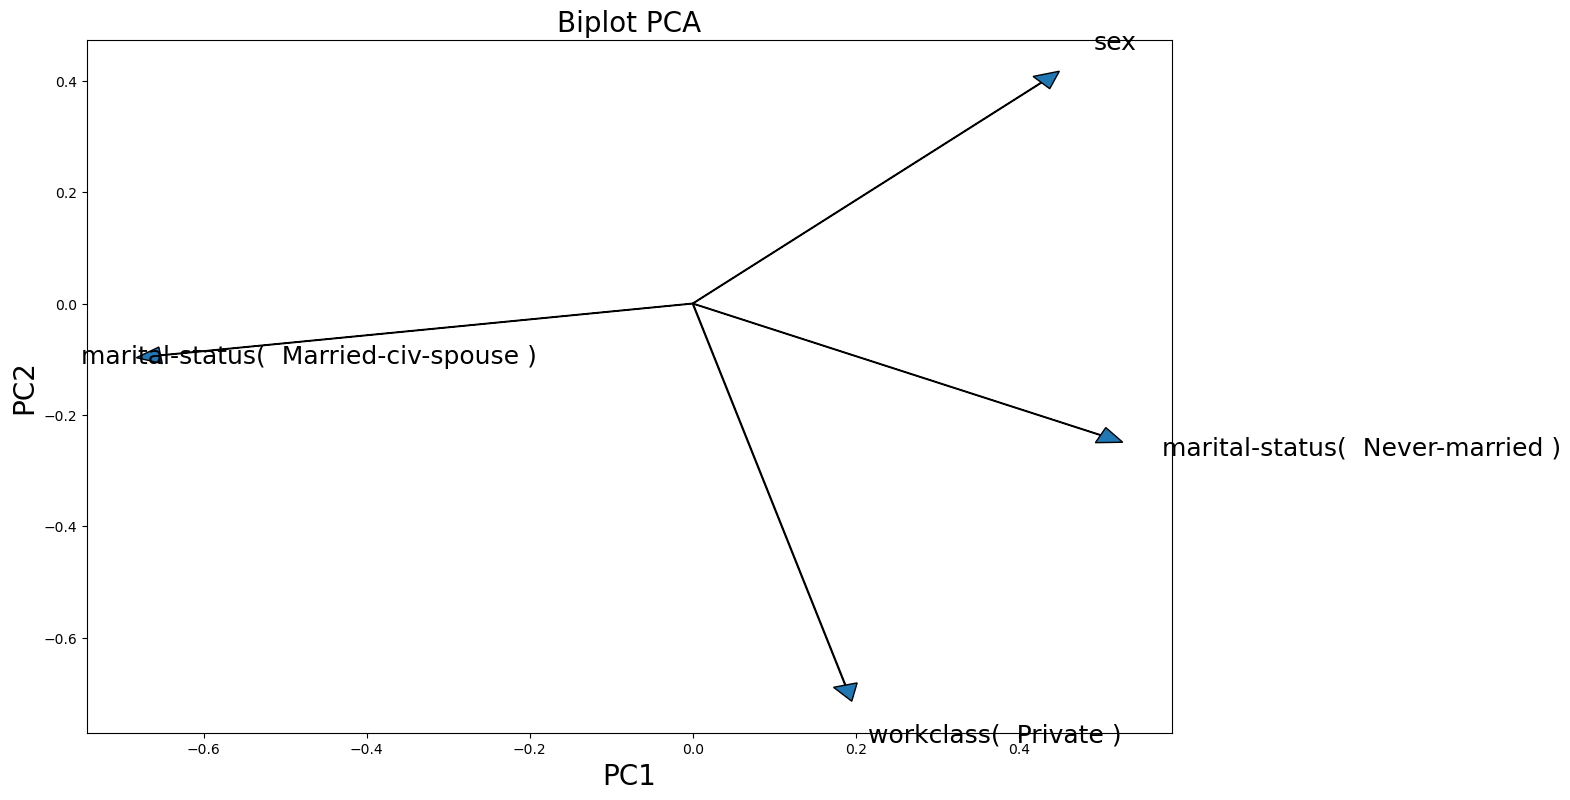

In [48]:
fig, ax = plt.subplots(figsize=(14, 9))

draw_arrow(id1_x, dataset.columns[id1_x], ax)
draw_arrow(id2_x, dataset.columns[id2_x], ax)
draw_arrow(id1_y, dataset.columns[id1_y], ax)
draw_arrow(id2_y, dataset.columns[id2_y], ax)

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Biplot PCA', fontsize=20)

## Supervised Models 

### Balanced accuracy of the model
#### Since the dataset is unbalanced, we use the balance accuracy measure

In [49]:
def accuracy(confusion_matrix):
    
    tpr = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
    tnr = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
    
    return (tpr + tnr) / 2

- x_train contains the predictive variables 
- y_train contains the target variable (the income)

### MLP Classifier 

In [50]:
model = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(16), (16,8), (32, 16, 8), (25,15,10), (20, 10, 5)],
    'max_iter': [400],
    'random_state': [1, 50]
}

scoring = 'accuracy'

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)

start_time = time.time()

grid_search.fit(x_train, y_train)   

print("Minutes:", (time.time() - start_time) // 60 )
print("Best combination of parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Minutes: 22.0
Best combination of parameters: {'hidden_layer_sizes': (16, 8), 'max_iter': 400, 'random_state': 1}
Best score: 0.8333840409348638


In [51]:
# TRAINING 
model = MLPClassifier(hidden_layer_sizes=(16,8), max_iter=400, random_state=1) 

model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=400, random_state=1)

In [52]:
# TESTING
x_val = test.iloc[:,0:-1].values
y_val = test.iloc[:,-1].values

y_pred = model.predict(x_val)
y_pred_train = model.predict(x_train)

cm = confusion_matrix(y_pred, y_val)
cm_train = confusion_matrix(y_pred_train, y_train)

acc_mlp_test = accuracy(cm)
acc_mlp_train = accuracy(cm_train)

print("Accuracy of testing MLPClassifier : ", acc_mlp_test)
print("Accuracy of training MLPClassifier : ", acc_mlp_train)

Accuracy of testing MLPClassifier :  0.7903533091705519
Accuracy of training MLPClassifier :  0.7963334897280195


### Decision Tree

In [53]:
# GRID SEARCH
start_time = time.time()

grid_of_values ={'ccp_alpha':[1, 0, 0.1, 0.05,0.005, 0.0005, 0.00005, 0.025, 0.00025, 0.0001]}

grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)

grid_model.fit(x_train,y_train)

best_alpha = grid_model.best_params_['ccp_alpha']

print("Minutes:", (time.time() - start_time) // 60 )
print("Best alpha value:",best_alpha)

# TRAINING
tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=best_alpha , random_state=0)
tree_model.fit(x_train, y_train)

# TESTING
y_predicted_testing = tree_model.predict(x_val)
y_predicted_training = tree_model.predict(x_train)

cm = confusion_matrix(y_predicted_testing, y_val)
cm_train = confusion_matrix(y_predicted_training, y_train)

acc_tree_test = accuracy(cm)
acc_tree_train = accuracy(cm_train)
print("Accuracy of testing Decision tree: ", acc_tree_test)
print("Accuracy of training Decision tree: ", acc_tree_train)

Minutes: 0.0
Best alpha value: 0.00025
Accuracy of testing Decision tree:  0.7896254820544404
Accuracy of training Decision tree:  0.7838563810211958


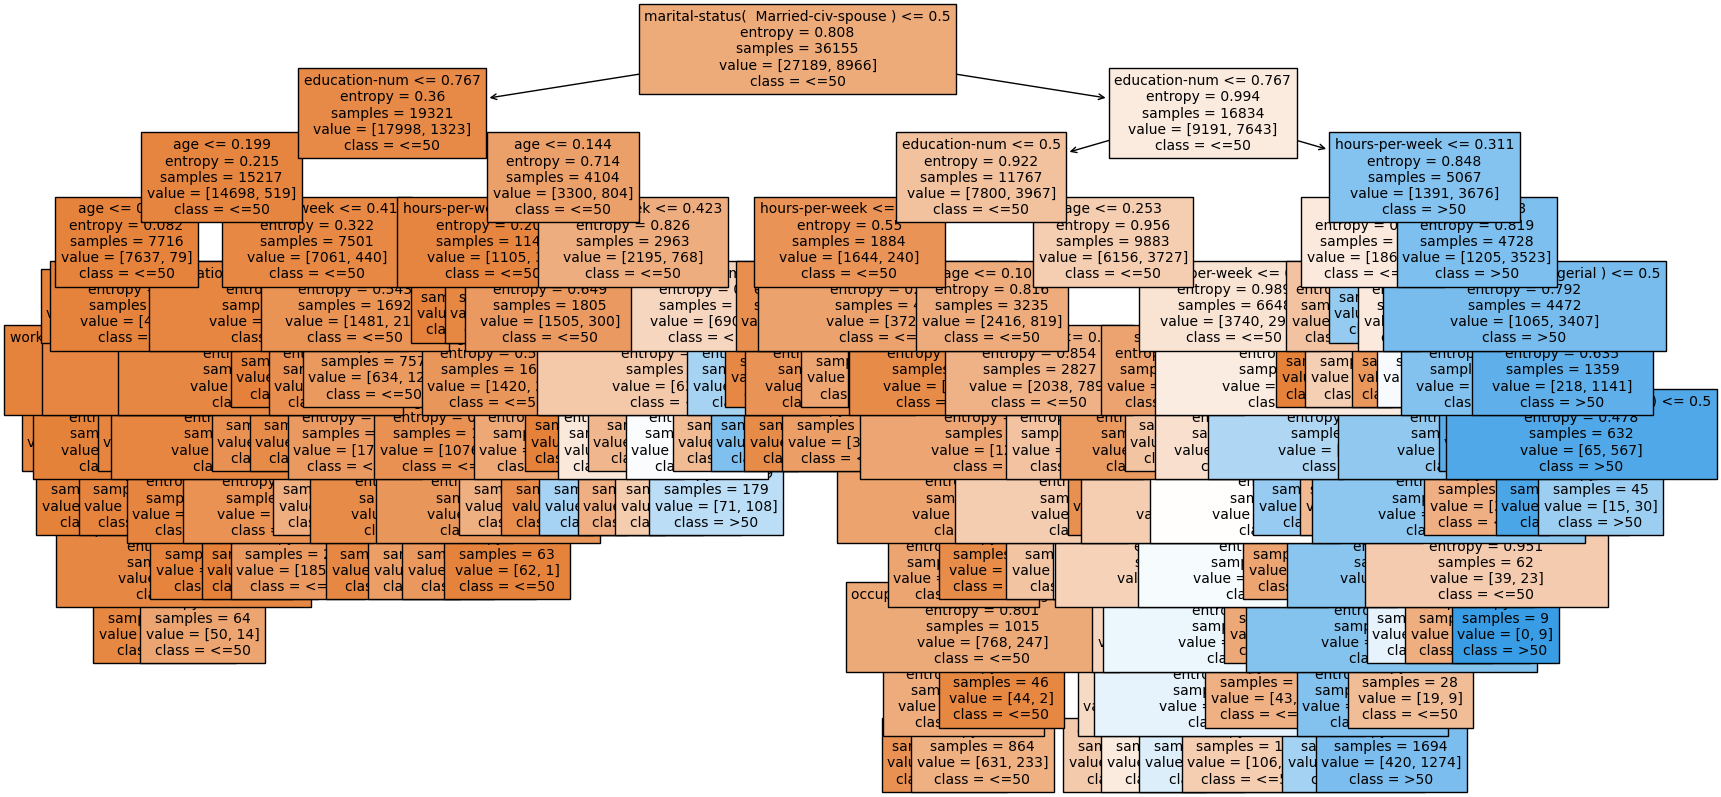

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))  

plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=dataset.columns.tolist(), class_names=['<=50','>50'], filled=True)

plt.show()

### Random Forest

In [55]:
# GRID SEARCH
grid_of_values ={'ccp_alpha':[1, 0, 0.1, 0.05, 0.0005, 0.00005, 0.025,0.0003, 0.00033,0.0004,0.0025]}

grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)

grid_model.fit(x_train,y_train)

best_alpha = grid_model.best_params_['ccp_alpha']

print("Best alpha value:",best_alpha)

# TRAINING
tree_model = RandomForestClassifier(n_estimators=100,criterion = 'entropy', \
                                    ccp_alpha=best_alpha , random_state=1)

tree_model.fit(x_train, y_train)

# TESTING
y_predicted_testing = tree_model.predict(x_val)

y_predicted_training = tree_model.predict(x_train)

cm = confusion_matrix(y_predicted_testing, y_val)

cm_train = confusion_matrix(y_predicted_training, y_train)

acc_forest_test = accuracy(cm)
acc_forest_train = accuracy(cm_train)
print("Accuracy of testing Forest Decision tree: ", acc_forest_test)
print("Accuracy of training Forest Decision tree: ", acc_forest_train)

Best alpha value: 0.0003
Accuracy of testing Forest Decision tree:  0.7890832628725268
Accuracy of training Forest Decision tree:  0.7999587393109359


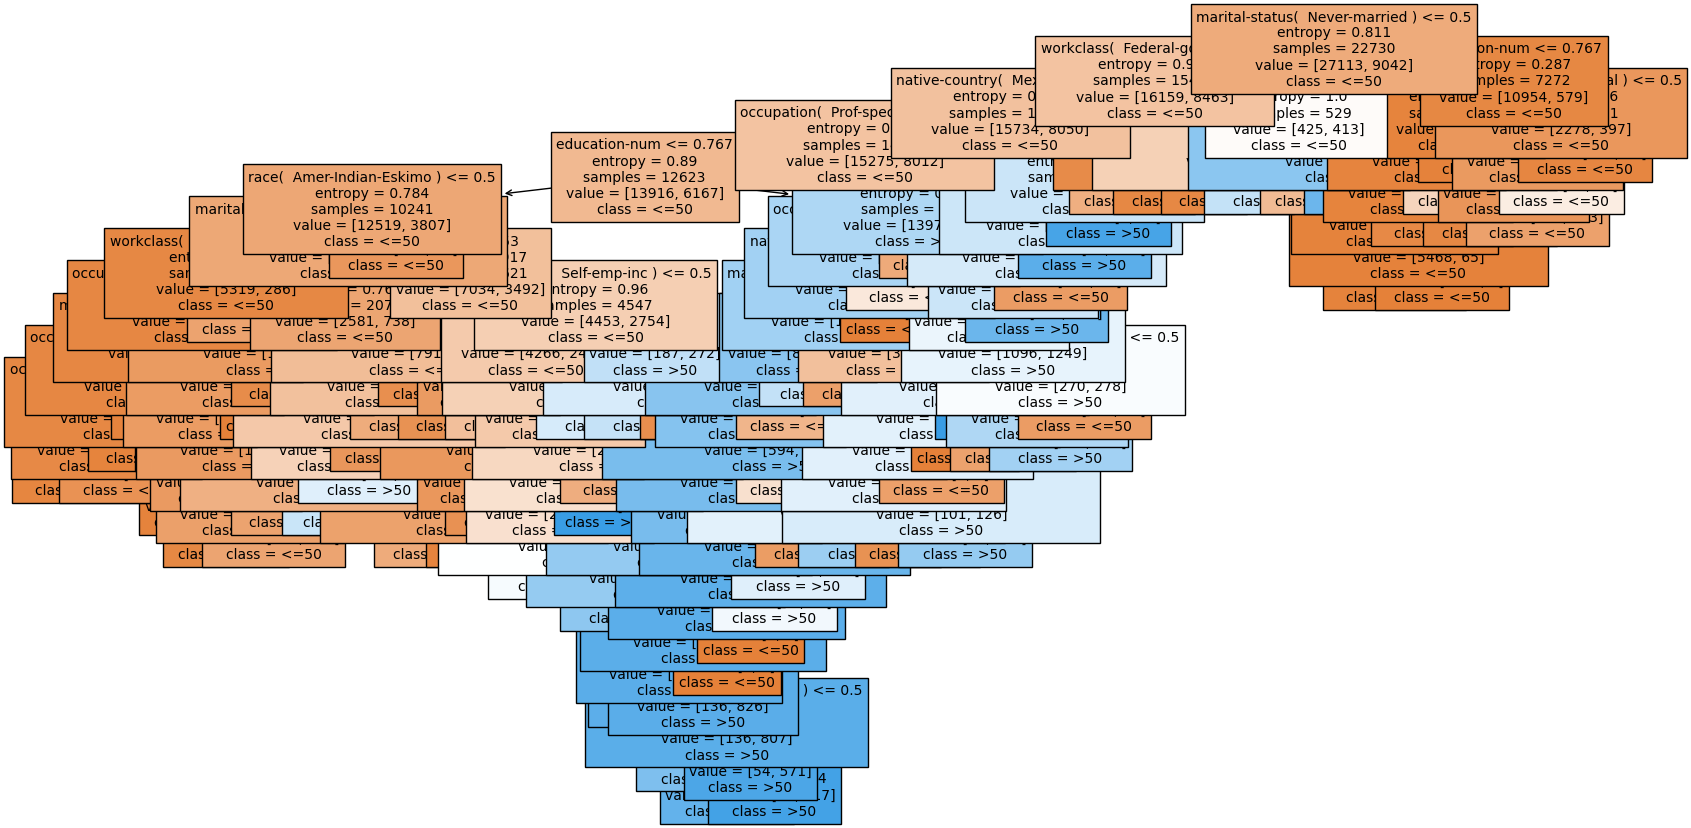

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model[0], ax=ax, fontsize=10, \
          feature_names=dataset.columns.tolist(), class_names=['<=50','>50'], filled=True)
plt.show()

### Logistic Regression

In [57]:
# TRAINING
logreg_model = LogisticRegression(max_iter=400,random_state=0)
logreg_model.fit(x_train, y_train)

# TESTING
y_predicted_testing = logreg_model.predict(x_val)
y_predicted_training = logreg_model.predict(x_train)

cm = confusion_matrix(y_predicted_testing, y_val)
cm_train = confusion_matrix(y_predicted_training, y_train)

acc_log_train = accuracy(cm_train)
acc_log_test = accuracy(cm)

print("Accuracy of testing Logistic function :", acc_log_test)
print("Accuracy of training Logistic function :", acc_log_train)

Accuracy of testing Logistic function : 0.7840749112133573
Accuracy of training Logistic function : 0.7789613395100811


## We compare the accuracy values obtained with the different supervised models

In [58]:
frame_accuracy = { "Model": ["MLPClassifier", "Decision Tree", \
                               "Random Forest", "Logistic Regression"], \
                   "Training Score": [acc_mlp_train, acc_tree_train, acc_forest_train,\
                                      acc_log_train], \
                   "Test Score": [acc_mlp_test, acc_tree_test, acc_forest_test, \
                                  acc_log_test] } 

df = pd.DataFrame(frame_accuracy) 

df.set_index(["Model"], inplace=True) 

#df.columns = pd.MultiIndex.from_product([["Score"], df.columns])
 
df

,Training Score,Test Score
Model,,
MLPClassifier,0.796333,0.790353
Decision Tree,0.783856,0.789625
Random Forest,0.799959,0.789083
Logistic Regression,0.778961,0.784075


<Axes: ylabel='Model'>

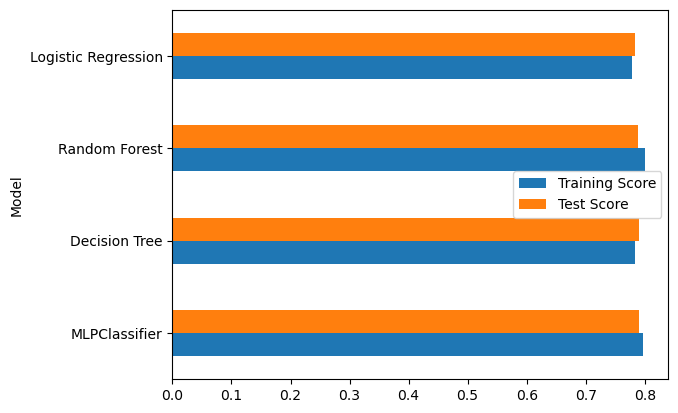

In [59]:
df.loc[:,'Training Score':'Test Score'].plot.barh()

### The results are very similar, the MLP Classifier is the supervised model that has the best accuracy

### Unsupervised learning: clustering K-means 

In [60]:
x_train = train.iloc[:,0:-1].values
y_train = train.iloc[:,-1].values


In [2]:
kmeans_model = KMeans(n_clusters=2, init='random', n_init=10)
kmeans_model.fit(pca_coordinates)

y_labels = kmeans_model.labels_

silhouette_avg = silhouette_score(x_train, y_labels)
sample_silhouette_values = silhouette_samples(x_train, y_labels)

print(f'overall clustering silhouette {silhouette_avg}')

NameError: name 'KMeans' is not defined

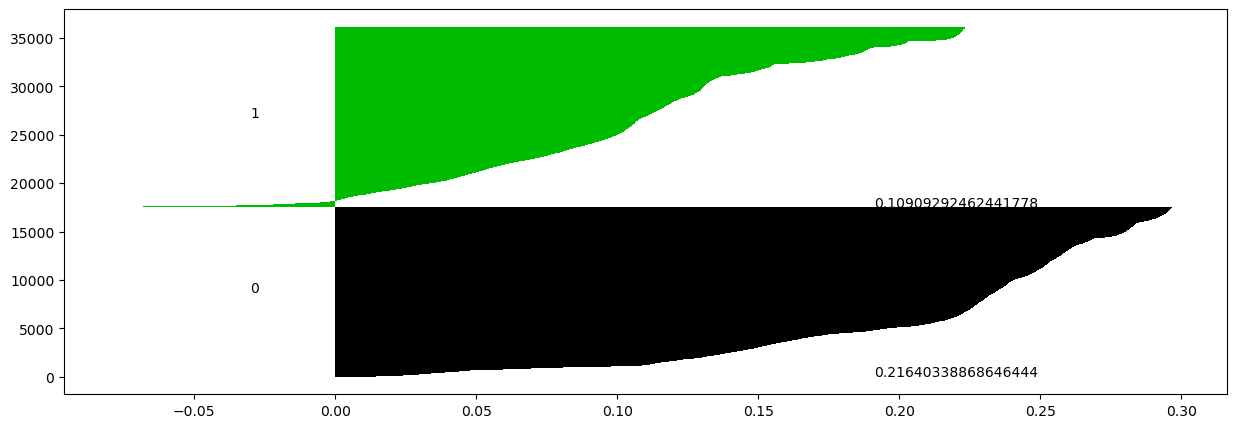

In [114]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
y_lower = 0 
y_upper = 0

for i,cluster in enumerate(np.unique(y_labels)):
    
    cluster_silhouette_vals = sample_silhouette_values[y_labels == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    
    y_upper += len(cluster_silhouette_vals)
    color = cm_matlib.nipy_spectral(float(i) / 2)
    
    ax.barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax.text(-0.03, (y_lower+y_upper)/2, str(i))
    ax.text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean) 
    
    y_lower += len(cluster_silhouette_vals)

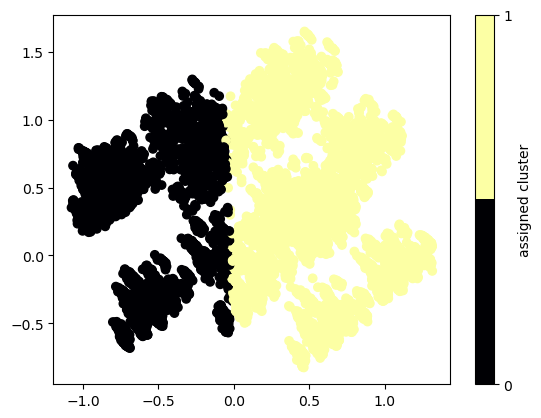

In [121]:
plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=y_labels,\
            cmap=plt.cm.get_cmap('inferno',2))
plt.colorbar(ticks=range(2), label='assigned cluster')